In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

Loading the dataset curated in excel

In [2]:
data = pd.read_excel("/content/dataset for inflation via cpi (1).xlsx")


 Preprocessing the data and converingt categorical variables to numeric using LabelEncoder or OneHotEncoder

In [3]:
label_encoder = LabelEncoder()

Encoding the 'Description' (Category) column


In [4]:
data['Category'] = label_encoder.fit_transform(data['Description/ category'])

Converting 'Month' to a numerical value, e.g., January -> 1, February -> 2, etc.


In [5]:
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
data['Month'] = data['Month'].map(month_mapping)

features = ['Year', 'Month', 'Category', 'Rural', 'Urban', 'Combined']

target = 'Combined'

Model preparation and preditction


In [6]:
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


testing


In [8]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 0.03170011441647637


getting important features

In [9]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

using bar graph and heat map for checking co-relation between features

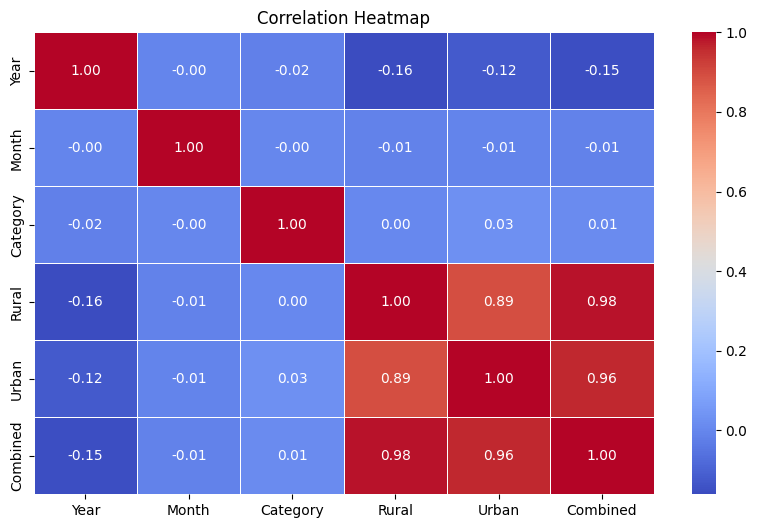

In [10]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

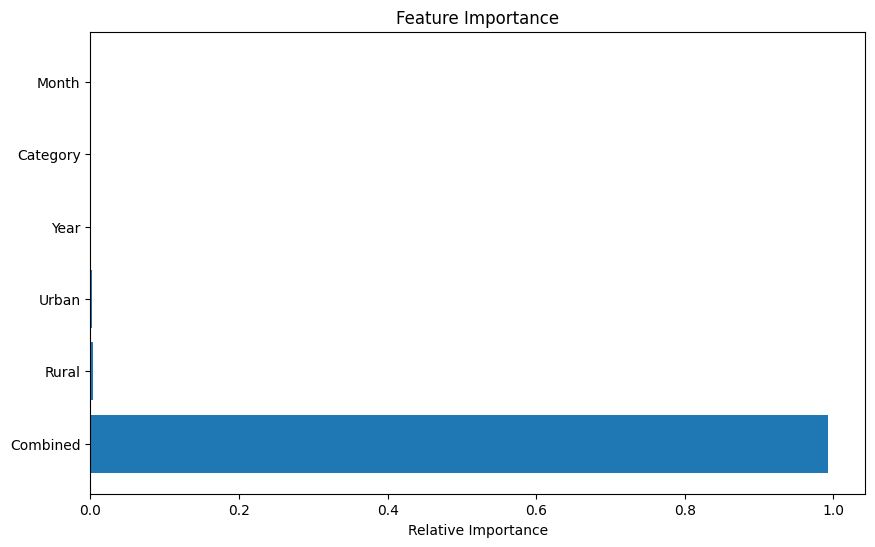

In [11]:
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(X_train.shape[1]), importances[indices], align="center")
plt.yticks(range(X_train.shape[1]), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Predicting inflation for new data on particular category for Example: Predict inflation for May 2025 for Food; Beverages and Tobacco (category=0)

In [12]:
new_data = pd.DataFrame({
    'Year': [2025],
    'Month': [5],  # May
    'Category': [label_encoder.transform(['Food; beverages and tobacco'])[0]],  # Encoding the category
    'Rural': [9.5],  # Example rural inflation rate
    'Urban': [10.0],  # Example urban inflation rate
    'Combined': [0]  # Placeholder, as we're predicting this
})

evaluation the model

In [13]:
predicted_inflation = model.predict(new_data)
print(f"Predicted inflation rate for May 2025: {predicted_inflation[0]}")

Predicted inflation rate for May 2025: 0.0055000000000000005


Visualizing Actual vs Predicted Inflation Rate
using SCATTER and RESIDUAL plot

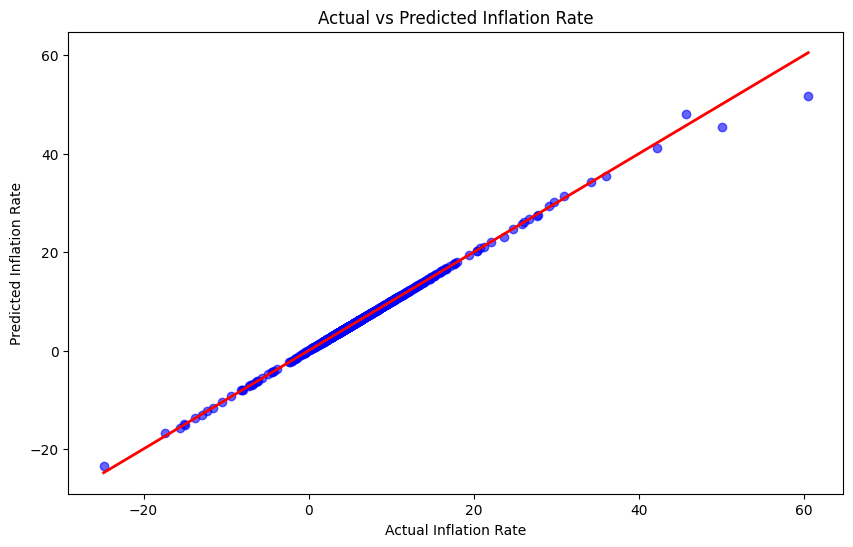

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # line y=x for comparison
plt.xlabel('Actual Inflation Rate')
plt.ylabel('Predicted Inflation Rate')
plt.title('Actual vs Predicted Inflation Rate')
plt.show()

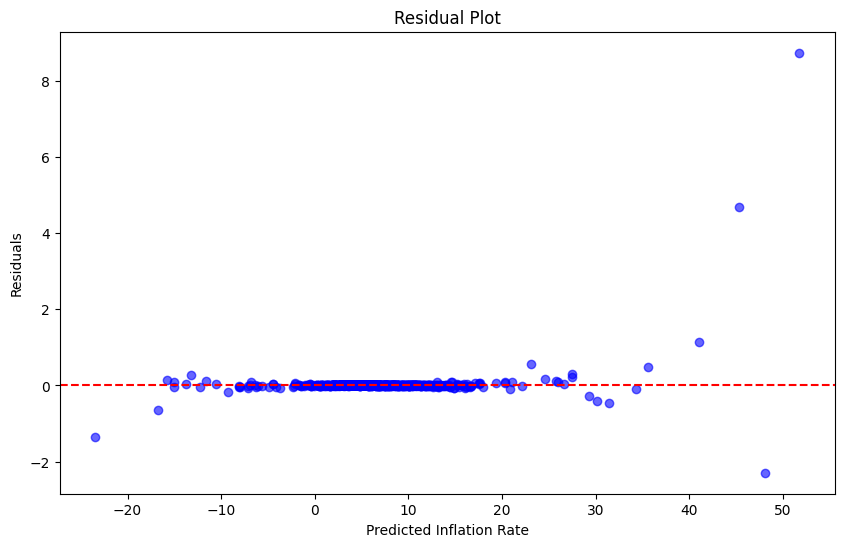

In [15]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Inflation Rate')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

evaluating accuratcy

In [16]:
r2 = r2_score(y_test, y_pred)
print(f'R² Score (Accuracy): {r2:.4f}')

R² Score (Accuracy): 0.9967


cross validation for checking stability and ensuring overfitting

In [17]:
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_rmse = np.sqrt(-cv_scores.mean())
print("Cross-validated RMSE:", mean_cv_rmse)

Cross-validated RMSE: 0.3051316882949814
